# 1.What is a Heatmap in Seaborn?
A heatmap is a graphical representation of data where values are represented using color intensity. 

In Seaborn, it’s typically used to visualize 2D data like matrices or correlation tables.

# 2. Why Do We Use It?

### 2.1. Visualizing Correlations
One of the most common uses is for displaying the correlation matrix of a DataFrame:

> Code Example <br>

<b> corr = df.corr()</b>

<b> sns.heatmap(corr, annot=True, cmap='coolwarm') </b>


<br>This quickly shows how strongly variables relate to each other (from -1 to +1), which is essential in:

o Feature selection

o Multicollinearity detection

o Model interpretation

<br>

### 2.2 Spotting Patterns in Matrices

Heatmaps are also used to visualize:

o Confusion matrices

o Pivot tables (e.g. sales by region and month)

o Missing data 

> Code Example<br>

<b> sns.heatmap(df.isnull()) </b>

<br>

### 2.3. Enhancing Insight with Colors

The use of color intensifies perception.
 
Darker or brighter colors naturally draw attention, so patterns, outliers, or trends become more obvious compared to a numerical table.
<br>

# 3. Is It Important?
There is no doubt :)

<table>
    <tr>
        <th>Purpose</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Data Understanding</td>
        <td>See which features are strongly correlated</td>
    </tr>
    <tr>
        <td>Model development</td>
        <td>Avoid multicollinearity</td>
    </tr>
    <tr>
        <td>Report creation</td>
        <td>Show high-level patterns clearly</td>
    </tr>
    <tr>
        <td>Missing value analysis</td>
        <td>Visualize where data is missing</td>
    </tr>
</table>

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load dataset
file_path = r"D:\DataVisualizationForPython\datasets\orders.xlsx"

file = pd.read_excel(file_path)

if file is None:
    raise FileNotFoundError("File Path Not Found. Please, Check Your File Path")

df = pd.DataFrame(file)
df.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,Tier
0,FDN27,9.437510,Snack Foods,195.313244,OUT046,1997,Small,Tier 1,897.085562,1
1,FDW35,9.033762,Fruits and Vegetables,36.371449,OUT035,2003,Small,Tier 2,1639.303513,2
2,FDS28,20.884849,Frozen Foods,70.318167,OUT013,2008,Small,Tier 1,2664.773737,1
3,FDC09,19.976300,Snack Foods,121.723264,OUT018,2009,Medium,Tier 3,440.859593,3
4,FDX04,10.824812,Snack Foods,264.673302,OUT035,2004,Small,Tier 1,29.807098,1


In [3]:
# convert to lower case all columns
df.columns = df.columns.str.lower()
df.columns

Index(['item_id', 'item_w', 'item_type', 'item_mrp', 'outlet_id',
       'outlet_year', 'outlet_size', 'outlet_location_type', 'sales', 'tier'],
      dtype='object')

In [6]:
# pivot table
plt.figure(figsize = (12, 8))
df_pivot = df.pivot_table(index = "outlet_year", columns="tier", values="sales")
df_pivot

tier,1,2,3
outlet_year,,,
1987,NaN,2563.556624,1439.366125
1988,NaN,857.786220,3651.266895
1996,1667.377374,NaN,NaN
1997,1938.512065,1765.128145,1556.877108
1998,1935.511831,618.027674,NaN
1999,3035.712633,3977.928645,NaN
2003,NaN,1639.303513,NaN
2004,1297.336075,1428.502473,2052.793590
2008,2664.773737,2749.387043,819.314494


<Figure size 1200x800 with 0 Axes>

In [19]:
# are there any missing values
print(df.isnull().sum())
print("There are no missing values in the dataset")


item_id                 0
item_w                  0
item_type               0
item_mrp                0
outlet_id               0
outlet_year             0
outlet_size             0
outlet_location_type    0
sales                   0
tier                    0
dtype: int64
There are no missing values in the dataset


In [20]:
df_pivot.isnull().sum()

tier
1    3
2    1
3    4
dtype: int64

In [48]:
df_pivot = df_pivot.fillna(df_pivot.mean())
df_pivot

tier,1,2,3
outlet_year,,,
1987,1948.259842,2563.556624,1439.366125
1988,1948.259842,857.786220,3651.266895
1996,1667.377374,1762.456595,1900.476830
1997,1938.512065,1765.128145,1556.877108
1998,1935.511831,618.027674,1900.476830
1999,3035.712633,3977.928645,1900.476830
2003,1948.259842,1639.303513,1900.476830
2004,1297.336075,1428.502473,2052.793590
2008,2664.773737,2749.387043,819.314494


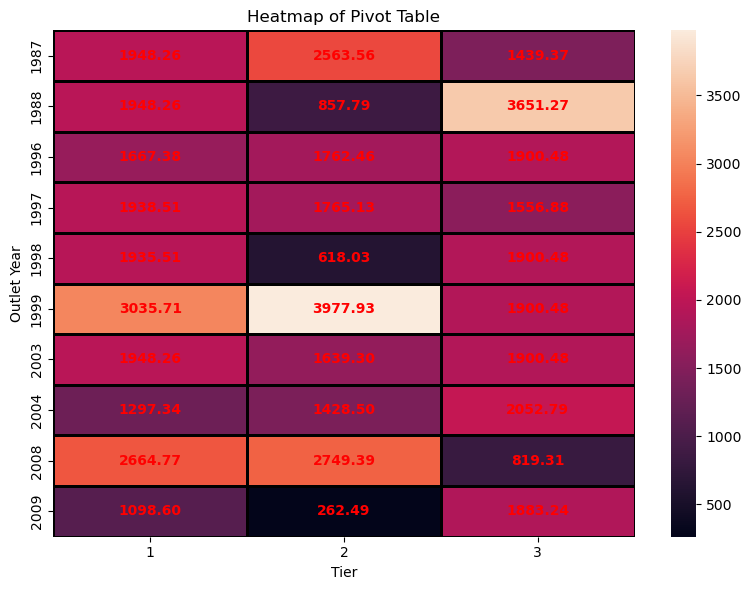

In [49]:
# visualize
plt.figure(figsize = (8, 6))
sns.heatmap(
    data = df_pivot,
    annot = True,
    fmt = ".2f",
    annot_kws= {
        "size": 10,
        "weight": "bold",
        "color": "red"
    },
    linewidths = 0.8,
    linecolor = "black"   
    )
plt.title("Heatmap of Pivot Table")
plt.xlabel("Tier")
plt.ylabel("Outlet Year")
plt.tight_layout()
plt.show()

In [ ]:
# fillna
tier_1_col_mean = df[df['tier'] == 1]['sales'].mean() # 1831.7797126242856
tier_2_col_mean = df[df['tier'] == 2]['sales'].mean() # 1897.9531817388884
tier_3_col_mean = df[df['tier'] == 3]['sales'].mean() # 1789.980191838889

df[df['tier'] == 1].fillna(tier_1_col_mean)
df[df['tier'] == 2].fillna(tier_2_col_mean)
df[df['tier'] == 3].fillna(tier_3_col_mean)

# assign to df
""" 
df.loc[df['tier'] == 1, 'sales'] = df.loc[df['tier'] == 1, 'sales'].fillna(tier_1_col_mean)
df.loc[df['tier'] == 2, 'sales'] = df.loc[df['tier'] == 2, 'sales'].fillna(tier_2_col_mean)
df.loc[df['tier'] == 3, 'sales'] = df.loc[df['tier'] == 3, 'sales'].fillna(tier_3_col_mean)
df.head(10)
""" 
# other way
df['sales'] = df['sales'].fillna(df.groupby('tier')['sales'].transform('mean'))



,item_id,item_w,item_type,item_mrp,outlet_id,outlet_year,outlet_size,outlet_location_type,sales,tier
0,FDN27,9.437510,Snack Foods,195.313244,OUT046,1997,Small,Tier 1,897.085562,1
1,FDW35,9.033762,Fruits and Vegetables,36.371449,OUT035,2003,Small,Tier 2,1639.303513,2
2,FDS28,20.884849,Frozen Foods,70.318167,OUT013,2008,Small,Tier 1,2664.773737,1
3,FDC09,19.976300,Snack Foods,121.723264,OUT018,2009,Medium,Tier 3,440.859593,3
4,FDX04,10.824812,Snack Foods,264.673302,OUT035,2004,Small,Tier 1,29.807098,1
5,FDR16,9.827295,Hard Drinks,156.443152,OUT035,2004,Small,Tier 2,1702.480561,2
6,FDU36,14.330597,Breads,62.460623,OUT013,1988,High,Tier 3,3651.266895,3
7,FDD40,20.920016,Health and Hygiene,197.551676,OUT018,2008,Medium,Tier 3,1001.051215,3
8,FDA21,10.596989,Breads,148.152945,OUT018,2009,Medium,Tier 3,4490.245081,3
9,FDZ36,11.393838,Fruits and Vegetables,142.569228,OUT013,1987,Medium,Tier 3,1045.165624,3


In [53]:
# corr()
num_cols = [col for col in df.columns if df[col].dtype in ['float','int']]
print(num_cols)

['item_w', 'item_mrp', 'sales']


In [57]:
# correlation matrix
corr_matrix = df[num_cols].corr()

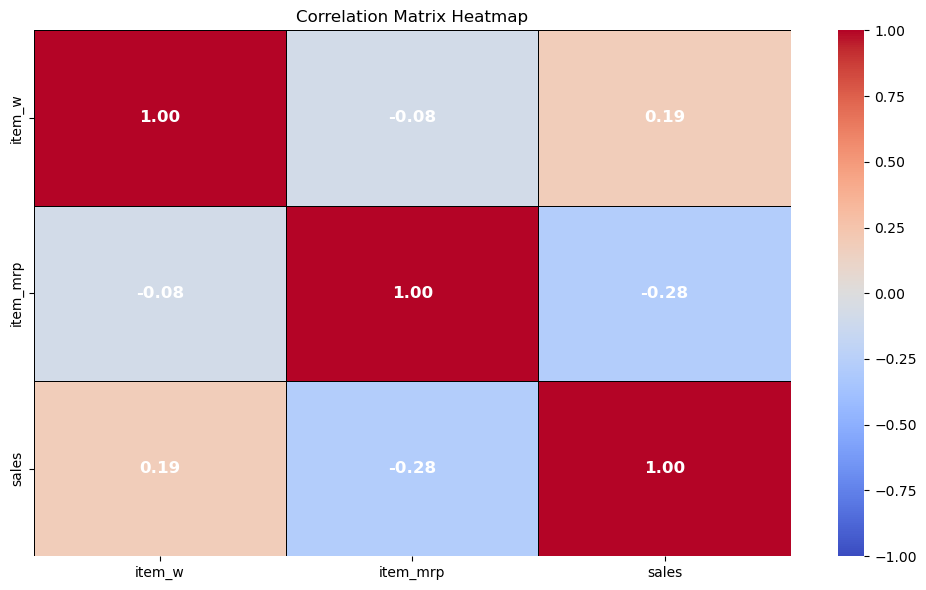

In [65]:
# visualize
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix,
            cmap = 'coolwarm' ,
            vmin = -1,
            vmax = 1,
            #center = 0,
            annot= True,
            fmt = '.2f',
            annot_kws= dict(
                size = 12,
                weight = 'bold',
                color = "white"
            ),
            linecolor= "black",
            linewidths= 0.6)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()